In [177]:
# Imports
import numpy as np
from scipy.linalg import det
from tqdm import tqdm
import matplotlib.pyplot as plt

rng = np.random.default_rng()

# Check for valid move for player vs bot version
def check(x, n):
    while True:
        if not (0 <= x[0] < n and 0 <= x[1] < n):
            print("Invalid move.")
            x = tuple(map(int, input("Enter row and column (space-separated): ").split()))
        else:
            return x

# Define the random strategy
def random_strategy(grid, n):
    # Get all empty cells
    empty_cells = [(i, j) for i in range(n) for j in range(n) if grid[i, j] == -1]
    # Return a random choice of cell from empty cells
    return rng.choice(empty_cells) if empty_cells else None

# Function to display the grid
def print_grid(grid):
    for row in grid:
        print(" ".join(map(lambda x: str(x) if x != -1 else "_", row)))
    print()

# Function to run the game
def matrix_game(n, player_0_strategy, player_1_strategy, bot_vs_bot=True, display=False, starting_player=0, interval=0):
    # Initialise the grid as an nxn matrix of -1s
    grid = np.full((n, n), -1)
    # Define the first turn
    turn = starting_player
    
    # If optimal strategy we need to keep track of the selected columns and the pairings of cells
    if player_0_strategy == optimal_strategy:
        selected_cols = []
        pairings = {}
    
    # While there are still empty cells, we play the game
    while -1 in grid:
        # Display the grid
        if display:
            print_grid(grid)
        
        # Player zero's turn
        if turn == 0:
            # Bot versus bot version
            if bot_vs_bot:
                # Get the coordinates from player zero's strategy
                i, j = tuple(player_0_strategy(grid, n))
                # Print player zero's move
                if display:
                    print(f"Player 0 plays at {(i+1,j+1)}")
            # Human versus bot version
            else:
                # Let human player enter coordinates
                i, j = tuple(map(lambda y: int(y) - 1, input("Your turn (row col): ").split()))
                # Check the coordinates are valid
                i, j = check((i,j), n)
                # If chosen cell already taken, make the player choose another
                while grid[i,j] != -1:  
                    print("Cell already filled. Choose another.")
                    x = tuple(map(int, input("Your turn (row col): ").split()))
            # Set the chosen value in the grid
            grid[i,j] = 0  
            # Change to player one's turn
            turn = 1
        # If player one's turn
        else:
            # Get the coordinates from player ones's strategy
            i,j = player_1_strategy(grid, n)
            # Print player ones's move
            if display:
                print(f"Player 1 plays at {(i+1,j+1)}")
            # Set the chosen value in the grid
            grid[i,j] = 1 
            # Change to player zero's turn
            turn = 0
        
    # Print the final grid
    if display:
        print_grid(grid)
        
    # Calculate the determinant
    determinant = det(grid)
    # Standard game rules
    if interval == 0:
        # Declare the winner
        if display:
            # If determinant is 0 (close to - float nonsense)
            if np.isclose(determinant, 0):
                print("Game over! The determinant is 0. Player 0 (zeros) wins!")
            else:
                print(f"Game over! The determinant is {determinant:.2f}. Player 1 (ones) wins!")
        
        # Return the winning player's number (0 or 1)
        return 1 if determinant != 0 else 0
    # Extended game rules
    else:
        # Declare the winner
        if display:
            # If determinant is in [-c,c]
            if abs(determinant) <= c:
                print(f"Game over! The determinant is {determinant}. Player 0 wins!")
            else:
                print(f"Game over! The determinant is {determinant:.2f}. Player 0 wins!")
        
        # Return the winning player's number (0 or 1)
        return 0 if abs(determinant) <= c else 1
            
# Testing
n = int(input("Enter the grid size (n): "))
matrix_game(n, random_strategy, random_strategy, bot_vs_bot=True, display=True, starting_player=0)

Enter the grid size (n):  2


_ _
_ _

Player 0 plays at (2, 2)
_ _
_ 0

Player 1 plays at (1, 2)
_ 1
_ 0

Player 0 plays at (1, 1)
0 1
_ 0

Player 1 plays at (2, 1)
0 1
1 0

Game over! The determinant is -1.00. Player 1 (ones) wins!


1

## Investigate random strategy
Here, we play the game many times over and use this to estimate the probability that player 0 wins under random selection for each $n$. We will then plot the probabilities against $n$.

We start by simply estimating the probabilities for $n=2$, with both player 0 starting and player 1 starting; we calculated the value of this with player 0 starting in the rubric, so we can compare to our empirical estimate.

In [20]:
# Parameters
n = 2
num_iter = 1000

# Lists to store simulation results
sim_results_0 = [] # Starting with player 0
sim_results_1 = [] # Starting with player 1

# Iterate num_iter times
for _ in range(num_iter):
    # Play games and add results to lists
    sim_results_0.append(matrix_game(n, random_strategy, random_strategy, bot_vs_bot=True, display=False, starting_player=0))
    sim_results_1.append(matrix_game(n, random_strategy, random_strategy, bot_vs_bot=True, display=False, starting_player=1))
    
# Calculate the probability of player zero winning in each case
prob_0 = 1 - sum(sim_results_0) / len(sim_results_0) # Player 0 starts
prob_1 = 1 - sum(sim_results_1) / len(sim_results_1) # Player 1 starts

# Print the probabilities
print(f"Probability that 0 wins given 0 starts: {prob_0:.2f}")
print(f"Probability that 0 wins given 1 starts: {prob_1:.2f}")

Probability that 0 wins given 0 starts: 0.66
Probability that 0 wins given 1 starts: 0.69


100%|██████████| 20/20 [13:33<00:00, 40.67s/it] 


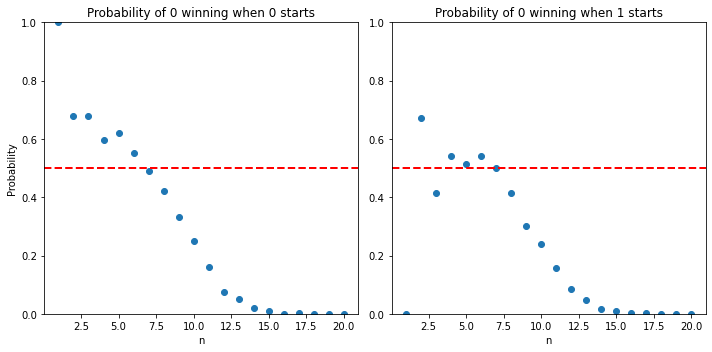

In [171]:
# Parameters
max_n = 20
num_iter = 1000

# Define a function to calculate the probabilities
def calc_probs(n):
    # Lists to store simulation results
    sim_results_0 = []
    sim_results_1 = []
    
    # Iterate num_iter times
    for _ in range(num_iter):
        # Play games and add results to lists
        sim_results_0.append(matrix_game(n, random_strategy, random_strategy, bot_vs_bot=True, display=False, starting_player=0))
        sim_results_1.append(matrix_game(n, random_strategy, random_strategy, bot_vs_bot=True, display=False, starting_player=1))
    
    # Calculate the probability of player zero winning in each case
    prob_0 = 1 - sum(sim_results_0) / len(sim_results_0) # Player 0 starts
    prob_1 = 1 - sum(sim_results_1) / len(sim_results_1) # Player 1 starts
    
    # Return the probabilities
    return prob_0, prob_1

# Lists to store the probabilities for different n values
probs_0 = []
probs_1 = []
# Loop over n (tqdm gives a progress bar)
for n in tqdm(range(1,max_n+1)):
    # Calculate probabilities
    prob_0, prob_1 = calc_probs(n)
    
    # Append probabilities to the lists
    probs_0.append(prob_0)
    probs_1.append(prob_1)
    
# Create figure
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot prob_0 against n
ax[0].scatter(list(range(1,max_n+1)), probs_0)
ax[0].set_title("Probability of 0 winning when 0 starts")
ax[0].set_xlabel("n")
ax[0].set_ylabel("Probability")
ax[0].set_ylim([0,1])
ax[0].axhline(y=0.5, color='red', linestyle='--', linewidth=2) 

# Plot prob_1 against n
ax[1].scatter(list(range(1,max_n+1)), probs_1)
ax[1].set_title("Probability of 0 winning when 1 starts")
ax[1].set_xlabel("n")
ax[1].set_ylim([0,1])
ax[1].axhline(y=0.5, color='red', linestyle='--', linewidth=2)

# Show the plots
plt.tight_layout()
plt.show()

## Bot Versus Bot Optimal Strategy

In [168]:
# For n>=4 case, we keep track of the selected columns globally
selected_cols = []
pairings = {}

# Optimal strategy (FOR PLAYER ZERO ONLY)
def optimal_strategy(grid, n):
    # Make the trackers global so function can change them
    global selected_cols
    global pairings
    
    # Case n=1
    if n == 1:
        # If n=1 can only play in one cell
        return (0, 0) 
    
    # Case n=2
    if n == 2:
        for i in range(n):
            for j in range(n):
                # Play in the row diagonally opposite to where player one played (else it defaults below)
                if grid[i, j] == 1 and grid[1-i,1-j] == -1: 
                    return (1 - i, 1 - j)
    
    # Case n=3
    if n == 3:
        # Identify all moves made by Player 1
        player1_moves = [(i, j) for i in range(n) for j in range(n) if grid[i, j] == 1]
        
        # Case 1: player 0 starts
        if starting_player == 0:
            if not player1_moves:
                return (0, 0)  # Always start at A11
            
            # Check for a forced minor
            if grid[0,1] == 0 and grid[0,2] == 1:
                if grid[1,0] == 1 and grid[2,1] == -1:
                    return (2,1)
                if grid[1,1] == 1 and grid[2,0] == -1:
                    return (2,0)
                if grid[2,0] == 1 and grid[1,1] == -1:
                    return (1,1)
                if grid[2,1] == 1 and grid[1,0] == -1:
                    return (1,0)
                
            if grid[1,0] == 0 and grid[2,0] == 1:
                if grid[0,1] == 1 and grid[1,2] == -1:
                    return (1,2)
                if grid[0,2] == 1 and grid[1,1] == -1:
                    return (1,1)
                if grid[1,1] == 1 and grid[0,2] == -1:
                    return (0,2)
                if grid[1,2] == 1 and grid[0,1] == -1:
                    return (0,1)
            
            # Threaten a row or column
            if grid[0,2] == -1:
                if grid[0,1] == -1:
                    return (0,1) 
                if grid[0,1] == 0:
                    return (0,2)
            if grid[2,0] == -1:
                if grid[1,0] == -1:
                    return (1,0)
                if grid[1,0] == 0:
                    return (2,0)
                
        ### NOTE: Case n=3 for player 1 starting not implemented ###

    if n >= 4:
        # Select columns
        # Player zero starts
        if starting_player == 0 and np.all(grid == -1):  
            # n even
            if n % 2 == 0:
                # Select all columns
                selected_cols = list(range(n))
            # n odd
            else:
                # Select all except the final column
                selected_cols = list(range(n-1))
                
        # Player one starts
        if starting_player == 1 and np.sum(grid == 1) == 1:
            # n even
            if n % 2 == 0:
                # Select all columns
                selected_cols = list(range(n))
            # n odd
            else:
                # Select all columns except the one player one already played in
                col_index = np.where(grid==1)[1][0] 
                selected_cols = [i for i in range(n) if i != col_index]

        # Select pairings
        if (starting_player == 0 and np.all(grid == -1)) or (starting_player == 1 and np.sum(grid == 1) == 1):
            for i in range(n):
                for index, j in enumerate(selected_cols):
                    # If in even index, pair with odd index to the right of it
                    if index % 2 == 0:
                        pairings[(i,j)] = (i,selected_cols[(index+1) % len(selected_cols)])
                    # If in odd index, pair with even index to the left of it
                    else:
                        pairings[(i,j)] = (i,selected_cols[index-1])
                  
            # If odd, we will have a final column that is not selected
            not_selected_cols = [j for j in range(n) if j not in selected_cols]
            
            if len(not_selected_cols) == 1:
                # Get the indices in the final column
                col_index = not_selected_cols[0]
                col = grid[:, col_index]
                empty_indices = np.where(col == -1)[0]
                
                # Take out the final value (this is in the case where 0 starts, where player zero will have filled that one)
                if len(empty_indices) % 2 != 0:
                    empty_indices = np.delete(empty_indices,-1)
                
                # Pair up the entries in the final column
                # Player zero starts
                if starting_player==0:
                    for i, index in enumerate(empty_indices):
                        # Even index pairs with the next
                        if index % 2 == 0:
                            pairings[(i,col_index)] = (empty_indices[(index+1) % len(empty_indices)],col_index)
                        # Odd index pairs with the previous
                        else:
                            pairings[(i,col_index)] = (empty_indices[index-1],col_index)
                # Player one starts
                if starting_player==1:
                    for index, i in enumerate(empty_indices):
                        if index % 2 == 0:
                            pairings[(i,col_index)] = (empty_indices[(index+1) % len(empty_indices)],col_index)
                        else:
                            pairings[(i,col_index)] = (empty_indices[index-1],col_index) 
        
        # Player zero's first move
        if starting_player == 0 and np.all(grid == -1):
            # If n even we play top left corner
            if n % 2 == 0:
                return (0,0)
            # If n odd we play bottom left corner (to make number of entries in the final column even)
            else: 
                return (n-1,n-1)
        
        # Select move
        for i in range(n):
            for j in range(n):
                # Try to select the pair corresponding to player one's move
                try:
                    if grid[i,j] == 1 and grid[pairings[i, j]] == -1:
                        return pairings[i,j]
                # Default if this fails
                except:
                    empty_cells = [(i, j) for i in range(n) for j in range(n) if grid[i, j] == -1]
                    if (0, selected_cols[0]) in empty_cells:
                        return (0, selected_cols[0])

    # Otherwise, play the first available move
    for i in range(n):
        for j in range(n):
            if grid[i, j] == -1:
                return (i, j)
            
    # Make sure there is a return (this should never be triggered)
    return (0,0)
            

# Test optimal strategy
n = int(input("Enter the grid size (n): "))
starting_player=0
matrix_game(n, optimal_strategy, random_strategy, bot_vs_bot=True, display=True, starting_player=starting_player)

Enter the grid size (n):  5


_ _ _ _ _
_ _ _ _ _
_ _ _ _ _
_ _ _ _ _
_ _ _ _ _

Player 0 plays at (5, 5)
_ _ _ _ _
_ _ _ _ _
_ _ _ _ _
_ _ _ _ _
_ _ _ _ 0

Player 1 plays at (4, 2)
_ _ _ _ _
_ _ _ _ _
_ _ _ _ _
_ 1 _ _ _
_ _ _ _ 0

Player 0 plays at (4, 1)
_ _ _ _ _
_ _ _ _ _
_ _ _ _ _
0 1 _ _ _
_ _ _ _ 0

Player 1 plays at (4, 5)
_ _ _ _ _
_ _ _ _ _
_ _ _ _ _
0 1 _ _ 1
_ _ _ _ 0

Player 0 plays at (3, 5)
_ _ _ _ _
_ _ _ _ _
_ _ _ _ 0
0 1 _ _ 1
_ _ _ _ 0

Player 1 plays at (5, 1)
_ _ _ _ _
_ _ _ _ _
_ _ _ _ 0
0 1 _ _ 1
1 _ _ _ 0

Player 0 plays at (5, 2)
_ _ _ _ _
_ _ _ _ _
_ _ _ _ 0
0 1 _ _ 1
1 0 _ _ 0

Player 1 plays at (3, 2)
_ _ _ _ _
_ _ _ _ _
_ 1 _ _ 0
0 1 _ _ 1
1 0 _ _ 0

Player 0 plays at (3, 1)
_ _ _ _ _
_ _ _ _ _
0 1 _ _ 0
0 1 _ _ 1
1 0 _ _ 0

Player 1 plays at (1, 4)
_ _ _ 1 _
_ _ _ _ _
0 1 _ _ 0
0 1 _ _ 1
1 0 _ _ 0

Player 0 plays at (1, 3)
_ _ 0 1 _
_ _ _ _ _
0 1 _ _ 0
0 1 _ _ 1
1 0 _ _ 0

Player 1 plays at (2, 2)
_ _ 0 1 _
_ 1 _ _ _
0 1 _ _ 0
0 1 _ _ 1
1 0 _ _ 0

Player 0 plays at (2, 1)
_ _ 0 1 _
0 

0

100%|██████████| 15/15 [03:06<00:00, 12.41s/it]


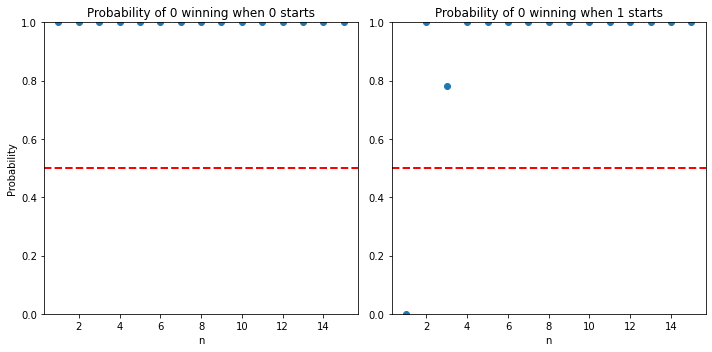

In [172]:
# Parameters
max_n = 15
num_iter = 1000

# Function to calculate probabilities
def calc_probs(n):
    sim_results_0 = []
    sim_results_1 = []
    
    for _ in range(num_iter):
        sim_results_0.append(matrix_game(n, optimal_strategy, random_strategy, bot_vs_bot=True, display=False, starting_player=0))
        sim_results_1.append(matrix_game(n, optimal_strategy, random_strategy, bot_vs_bot=True, display=False, starting_player=1))
    
    prob_0 = 1 - sum(sim_results_0) / len(sim_results_0)
    prob_1 = 1 - sum(sim_results_1) / len(sim_results_1)
    
    return prob_0, prob_1

# Plot probabilities against n
probs_0 = []
probs_1 = []
for n in tqdm(range(1,max_n+1)):
    prob_0, prob_1 = calc_probs(n)
    
    probs_0.append(prob_0)
    probs_1.append(prob_1)
    

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(list(range(1,max_n+1)), probs_0)
ax[0].set_title("Probability of 0 winning when 0 starts")
ax[0].set_xlabel("n")
ax[0].set_ylabel("Probability")
ax[0].set_ylim([0,1])
ax[0].axhline(y=0.5, color='red', linestyle='--', linewidth=2) 

ax[1].scatter(list(range(1,max_n+1)), probs_1)
ax[1].set_title("Probability of 0 winning when 1 starts")
ax[1].set_xlabel("n")
ax[1].set_ylim([0,1])
ax[1].axhline(y=0.5, color='red', linestyle='--', linewidth=2)

# Show the plots
plt.tight_layout()
plt.show()

## Extension

100%|██████████| 5/5 [05:49<00:00, 69.81s/it] 


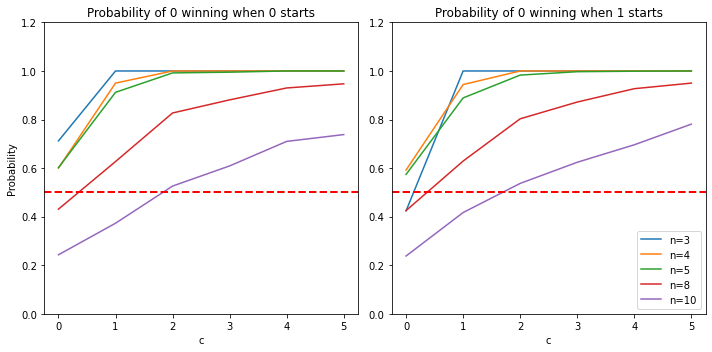

In [198]:
# Parameters
ns = [3, 4, 5, 8, 10]
max_c = 5
num_iter = 1000

# Calculate probabilities for different values of n and c
def calc_probs(n, c):
    sim_results_0 = []
    sim_results_1 = []
    
    for _ in range(num_iter):
        sim_results_0.append(matrix_game(n, random_strategy, random_strategy, bot_vs_bot=True, display=False, starting_player=0, interval=c))
        sim_results_1.append(matrix_game(n, random_strategy, random_strategy, bot_vs_bot=True, display=False, starting_player=1, interval=c))
    
    prob_0 = 1 - sum(sim_results_0) / len(sim_results_0)
    prob_1 = 1 - sum(sim_results_1) / len(sim_results_1)
    
    return prob_0, prob_1

# Plot probabilities against c for different n
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

for n in tqdm(ns):
    probs_0 = []
    probs_1 = []
    for c in np.linspace(0,max_c, max_c+1):
        prob_0, prob_1 = calc_probs(n, c)

        probs_0.append(prob_0)
        probs_1.append(prob_1)

    ax[0].plot(np.linspace(0,max_c, max_c+1), probs_0, label=f'n={n}')
    ax[1].plot(np.linspace(0,max_c, max_c+1), probs_1, label=f'n={n}')

ax[0].set_title("Probability of 0 winning when 0 starts")
ax[0].set_xlabel("c")
ax[0].set_ylabel("Probability")
ax[0].set_ylim([0,1.2])
ax[0].axhline(y=0.5, color='red', linestyle='--', linewidth=2)

ax[1].set_title("Probability of 0 winning when 1 starts")
ax[1].set_xlabel("c")
ax[1].set_ylim([0,1.2])
ax[1].axhline(y=0.5, color='red', linestyle='--', linewidth=2)

# Show the plots
plt.legend()
plt.tight_layout()
plt.show()

In [199]:
np.linspace(0,max_c, max_c+1)

array([0., 1., 2., 3., 4., 5.])